In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import acquire
import prepare
import explore
import modeling

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Allow all columns to be displayed
pd.set_option('display.max_columns', None)

# Project purpose

The goal of this project is to use features captured from survey data to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines.

Specifically, I will be predicting two probabilities:
- h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
- seasonal_vaccine - Whether respondent received seasonal flu vaccine.
> Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

# Project Plan

1. Aquisition
  * Download data into local drive
2. Prepare
  * Read in data csv using pandas
  * Chekck data types and null values
  * Fill in nulls
  * Encode appropriately
  * Scale if needed
3. Explore
  * Create visualizations
  * Perform statistical testing
4. Modeling
  * Model using logit classifier, KNN and random forest
5. Conclusions
  * What works, what didn't and next steps

# Acquire and Prepare

- I downloaded the data from https://www.drivendata.org/competitions/66/flu-shot-learning/data/ into the same file where this analysis is being conducted
- Then I turned both the feature csv and the target variable csv data into a pandas dataframes for analysis and modeling

### The preparation steps are as follows:
- Split the data into seasonal and h1n1 dataframes for the sake of exploration
- Dropped columns that were too empty to be useful or easily filled in
- 

In [2]:
df = acquire.acquire_data()
df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


In [3]:
# summarize_missing_data = prepare.percent_nans(df)
# summarize_missing_data

In [4]:
column_list= ['h1n1_concern','h1n1_knowledge', 
       'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective',
       'opinion_seas_risk',
       'opinion_seas_sick_from_vacc',
       'household_adults',
       'household_children']

In [5]:
h1n1_train, h1n1_test, seasonal_train, seasonal_test = prepare.prepare_data(df, column_list)

                         column n_nans  percentage_nans
36             seasonal_vaccine      0         0.000000
30                   census_msa      0         0.000000
29               hhs_geo_region      0         0.000000
24                          sex      0         0.000000
23                         race      0         0.000000
21                    age_group      0         0.000000
35                 h1n1_vaccine      0         0.000000
4          behavioral_face_mask     19         0.071142
5         behavioral_wash_hands     42         0.157262
2     behavioral_antiviral_meds     71         0.265848
7       behavioral_outside_home     82         0.307036
6   behavioral_large_gatherings     87         0.325757
0                  h1n1_concern     92         0.344479
1                h1n1_knowledge    116         0.434343
8         behavioral_touch_face    128         0.479275
3          behavioral_avoidance    208         0.778822
32           household_children    249         0

### The final dataframe has 26,706 observations and 34 columns before being separated into seasonal and h1h1 dataframes for exploration

In [6]:
h1n1_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,encoded_employment_status,encoded_rent_or_own,encoded_marital_status,encoded_sex,age_group_18_-_34_years,age_group_35_-_44_years,age_group_45_-_54_years,age_group_55_-_64_years,age_group_65+_years,education_12_years,education_<_12_years,education_college_graduate,education_some_college,"income_poverty_<=_$75,000,_above_poverty","income_poverty_>_$75,000",income_poverty_below_poverty,race_black,race_hispanic,race_other_or_multiple,race_white,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,h1n1_concern_scaled,h1n1_knowledge_scaled,opinion_h1n1_vacc_effective_scaled,opinion_h1n1_risk_scaled,opinion_h1n1_sick_from_vacc_scaled,opinion_seas_vacc_effective_scaled,opinion_seas_risk_scaled,opinion_seas_sick_from_vacc_scaled,household_adults_scaled,household_children_scaled
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22067,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,4.0,2.0,2.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0,0,1,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.5,0.75,0.00,0.25,0.75,0.25,0.25,0.333333,0.000000
2876,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,4.0,5.0,5.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,bhuqouqj,"MSA, Principle City",0.0,0.0,0,0,1,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.5,1.00,0.75,1.00,1.00,0.75,0.25,0.000000,0.000000
22939,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,2.0,4.0,2.0,2.0,45 - 54 Years,College Graduate,Other or Multiple,Female,"> $75,000",Married,Rent,Employed,mlyzmhmf,Non-MSA,2.0,1.0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.5,0.50,0.75,0.25,0.75,0.25,0.25,0.666667,0.333333
4154,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,5.0,1.0,1.0,45 - 54 Years,< 12 Years,Other or Multiple,Male,"> $75,000",Married,Rent,Employed,mlyzmhmf,"MSA, Principle City",1.0,0.0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.75,0.00,0.00,1.00,0.00,0.00,0.333333,0.000000
23434,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,0,1,0,1,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.75,0.25,0.25,0.75,0.75,0.25,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0

In [7]:
seasonal_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21365 entries, 22862 to 7566
Data columns (total 74 columns):
h1n1_concern                                21365 non-null float64
h1n1_knowledge                              21365 non-null float64
behavioral_antiviral_meds                   21365 non-null float64
behavioral_avoidance                        21365 non-null float64
behavioral_face_mask                        21365 non-null float64
behavioral_wash_hands                       21365 non-null float64
behavioral_large_gatherings                 21365 non-null float64
behavioral_outside_home                     21365 non-null float64
behavioral_touch_face                       21365 non-null float64
doctor_recc_h1n1                            21365 non-null float64
doctor_recc_seasonal                        21365 non-null float64
chronic_med_condition                       21365 non-null float64
child_under_6_months                        21365 non-null float64
health_worker    

In [8]:
percent_vaccinated = (h1n1_train.h1n1_vaccine.value_counts()[1]/h1n1_train.shape[0])*100
percent_vaccinated

21.245026913175753

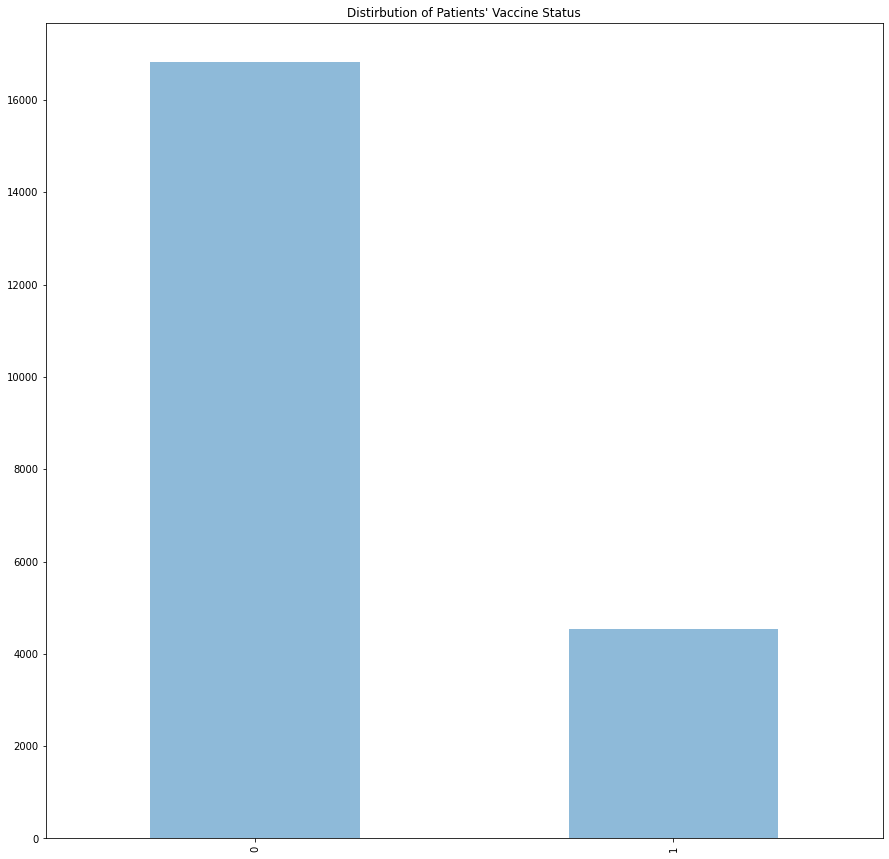

In [9]:
explore.distribution_of_h1n1_vaccine_status(h1n1_train)

### Key Takeaway^^
- Visual depiction of the fact that only 21% of the participants were vaccinated. Also important to note that when we did the train test split, we stratified the y variable, meaning the same proportion of people were vaccinated in the whole data set is equal to the proportion of vaccinated people in our training set. 

- Let's look at how certain demographic features relate to the overall vacination rate

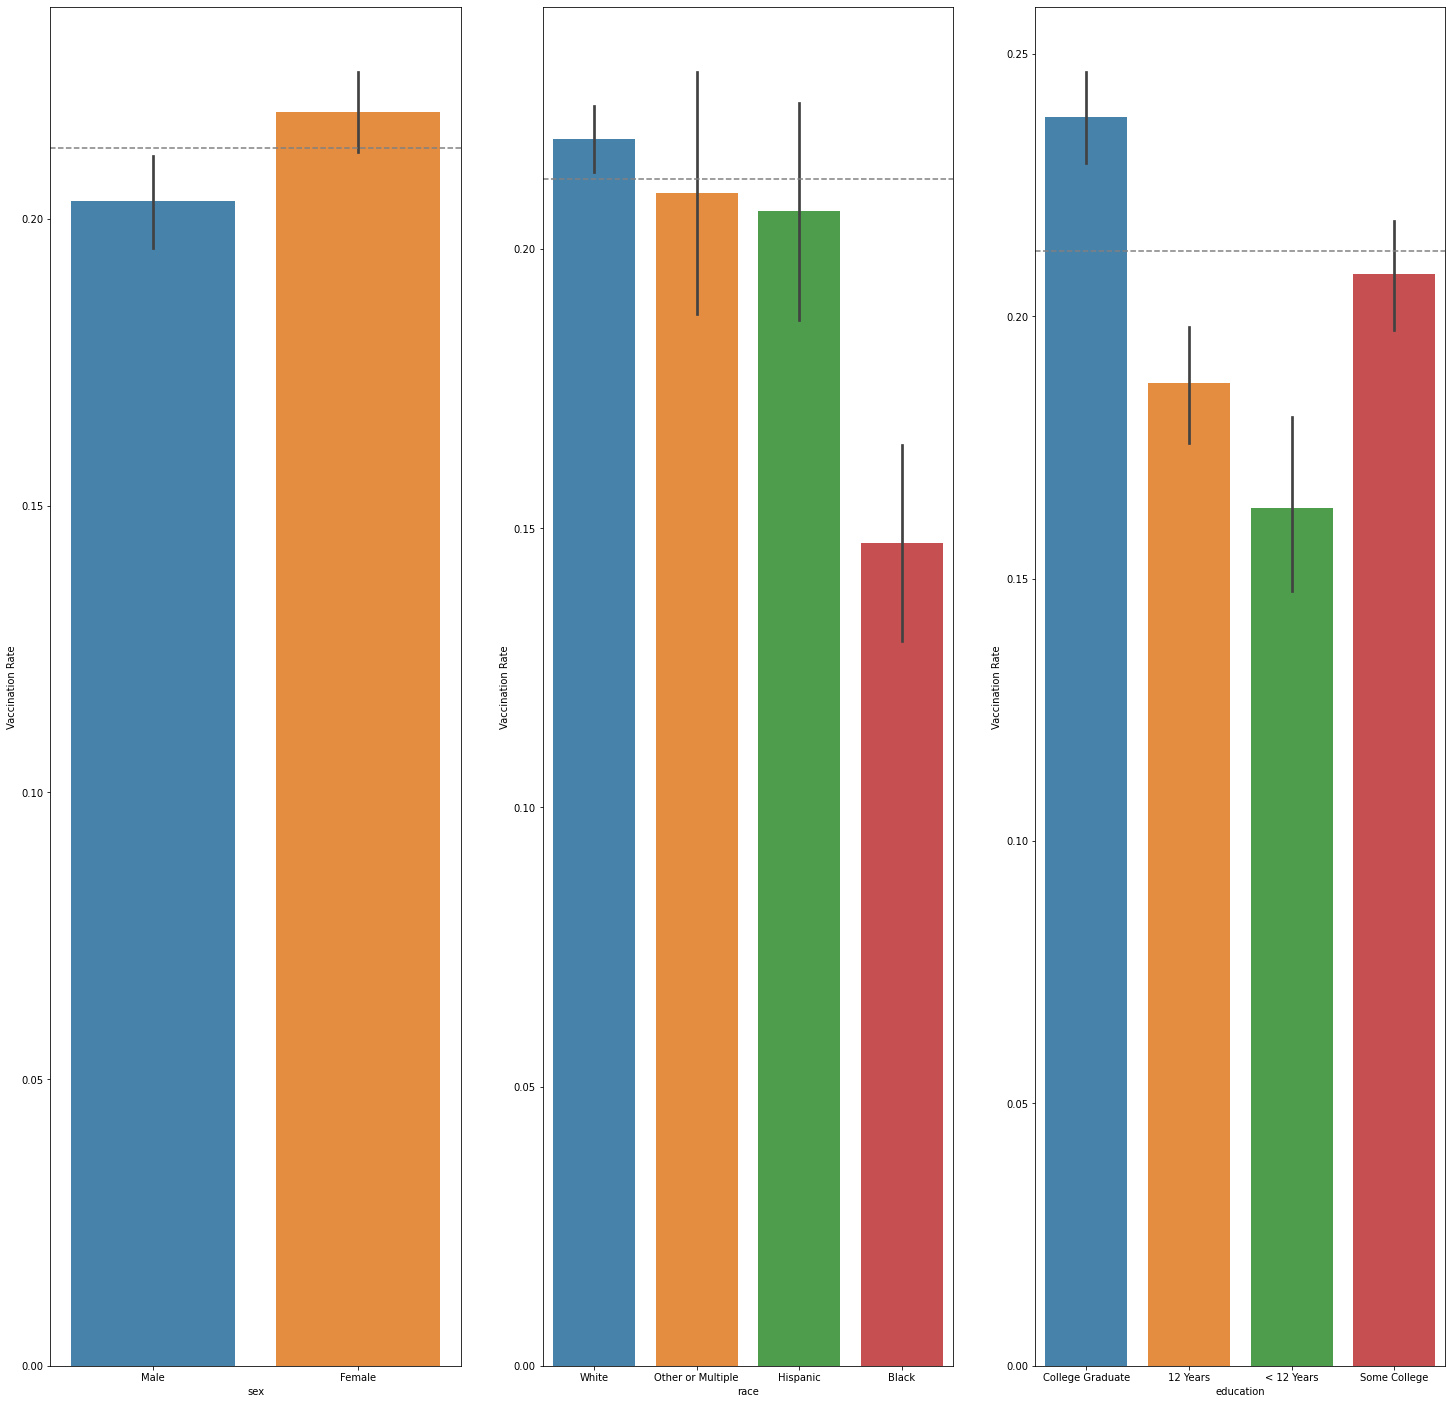

In [10]:
explore.sex_race_education_h1n1(h1n1_train)

### Key Takeaway ^^
- From these basic barplots, it looks like college graduated, white women get vaccinated above the average vaccination rate

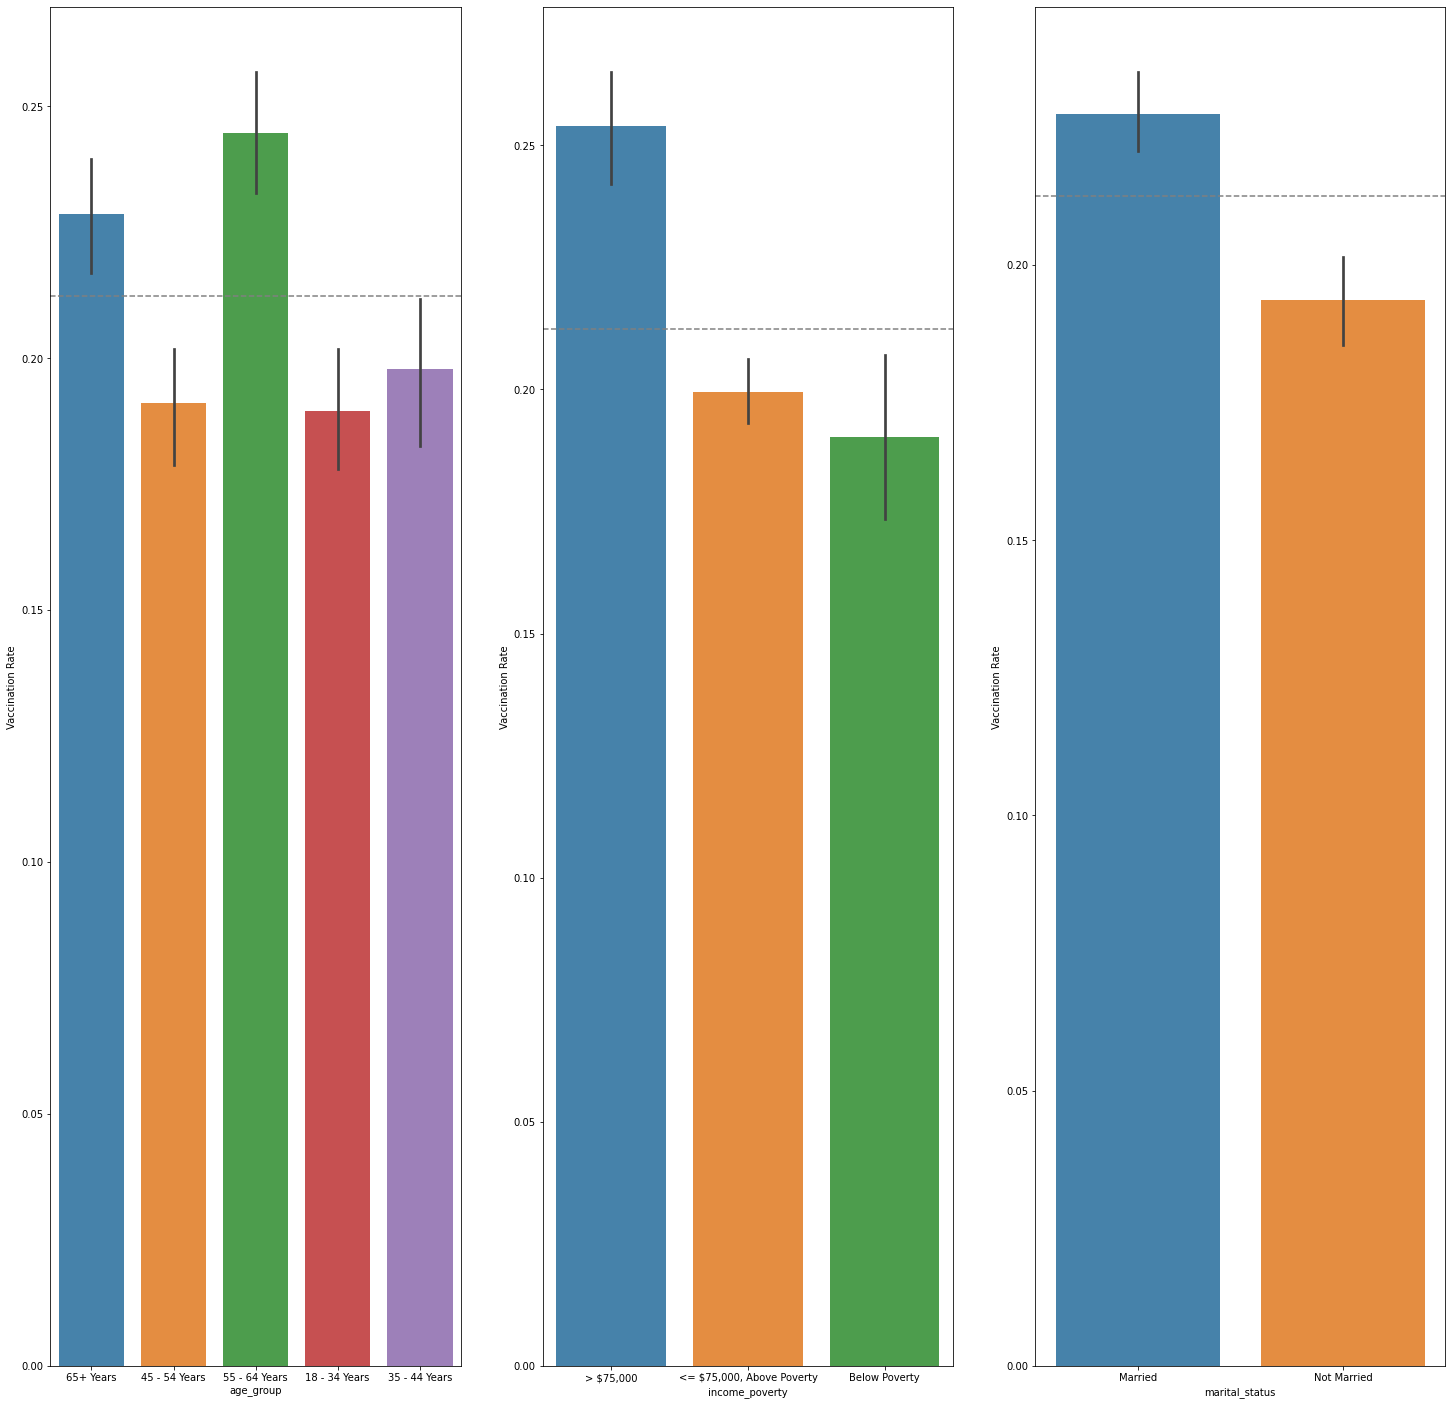

In [11]:
explore.age_income_marital_status(h1n1_train)

### Keytakeaway^^
- People who are over the age of 55 who make more than 75k a year, and who are married get this vaccine above the average vaccination rate

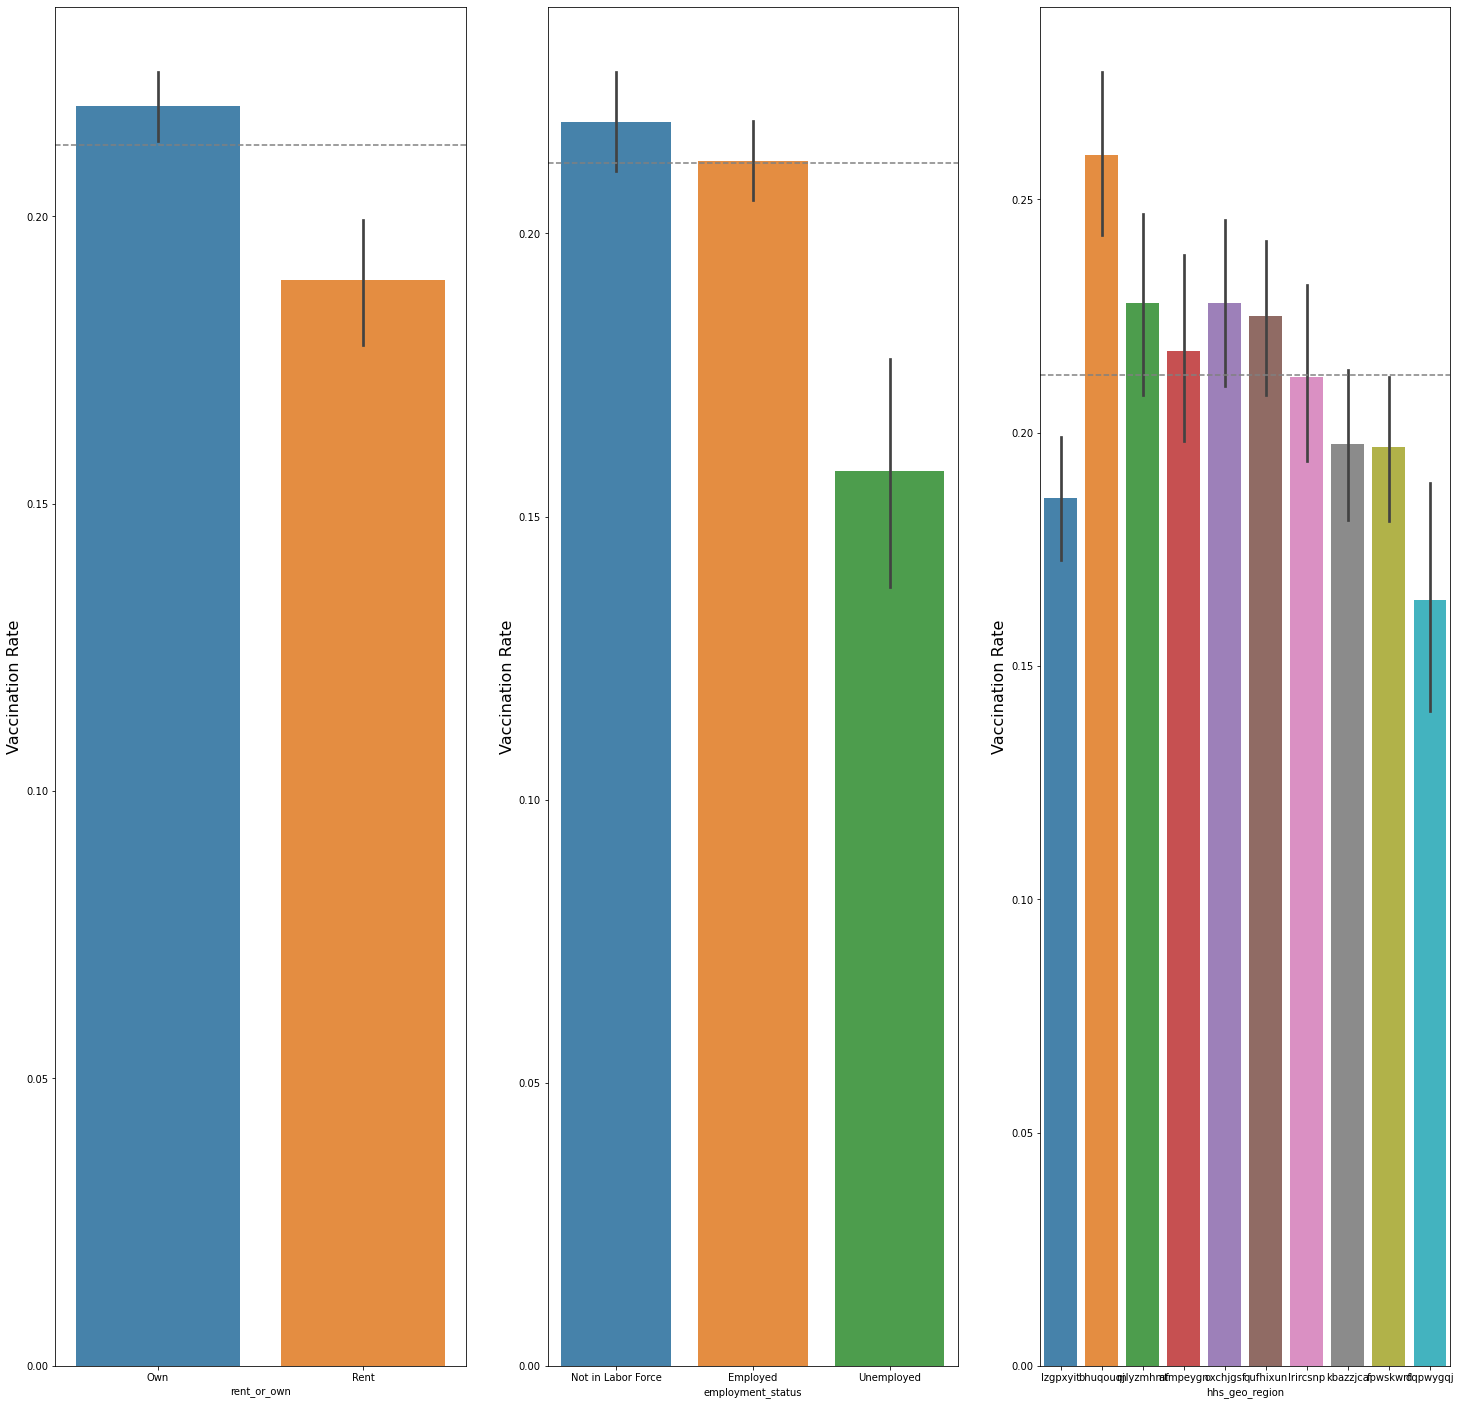

In [12]:
explore.rent_employment_geo(h1n1_train)

### Keytakeaway^^
- People who own their home, who are not in the labor force, and who live in five specific areas are have a higher than average vaccination rate

## Hypothesis Testing

Lest start by establishing a coonfidence level. Essentially, in order for something to be declared statstically significant, it must have a confidence level of 95%

alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

Is whether or not a person gets the H1N1 shot independent of their opinion of their risk of getting the disease?

### First Hypothesis:
- $H_0$: Getting the H1N11 flu shot is independent of their opinion of risk of getting the flu
- $H_a$: Getting the H1N11 flu shot is dependent on their opinion on risk of getting the flu

In [13]:
explore.chi_square_opinion_status(h1n1_train)

Observed

[[5919 6818  741 2667  681]
 [ 580 1401  163 1680  715]]
---
Expected

[[5118.28570091 6472.87123801  711.9449567  3423.47868008 1099.41942429]
 [1380.71429909 1746.12876199  192.0550433   923.52131992  296.58057571]]
---

chi^2 = 2218.1825
p     = 0.0000

        Because p (0.0000) is less than alpha (0.05), we reject the null hypothesis.
        This means that the chances of observing the relationship between 
        opinion and vaccine status due to chance are slim. 
        


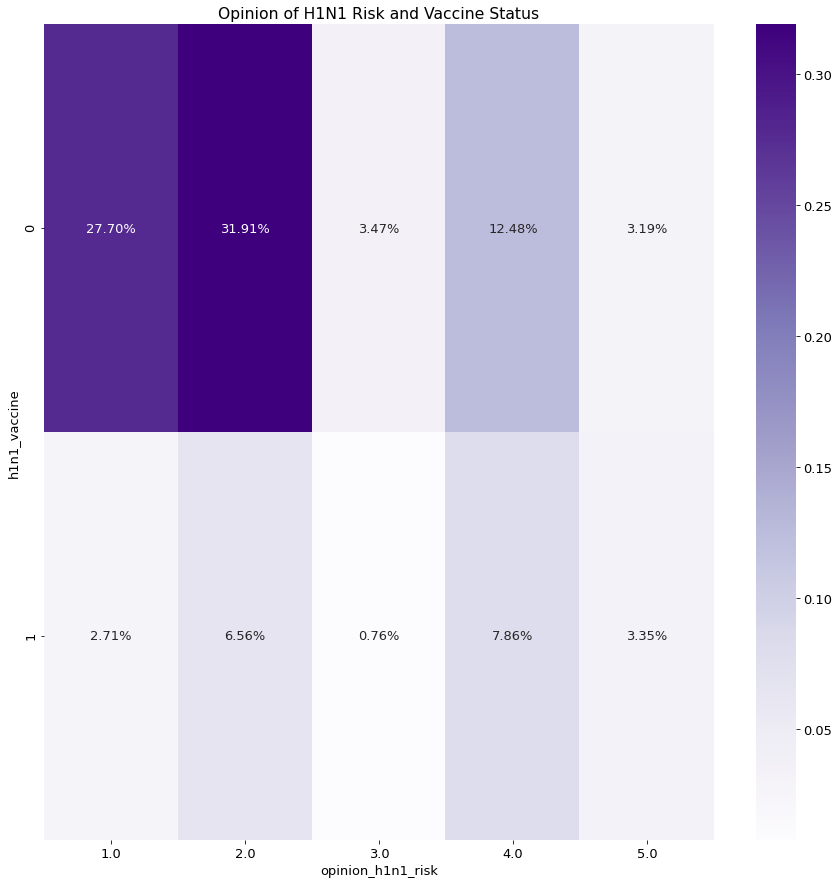

In [14]:
explore.opinion_h1n1_status(h1n1_train)

### Key Takeaway^^

Based on this quick crosstab, it looks like people who have a low opion of their risk of getting sick with h1n1 are less likely too have gotten the vaccine. However, those who had a high opion of their risk of getting sick with h1n1 don't overwhelmingly recieve the vaccine. Interesting

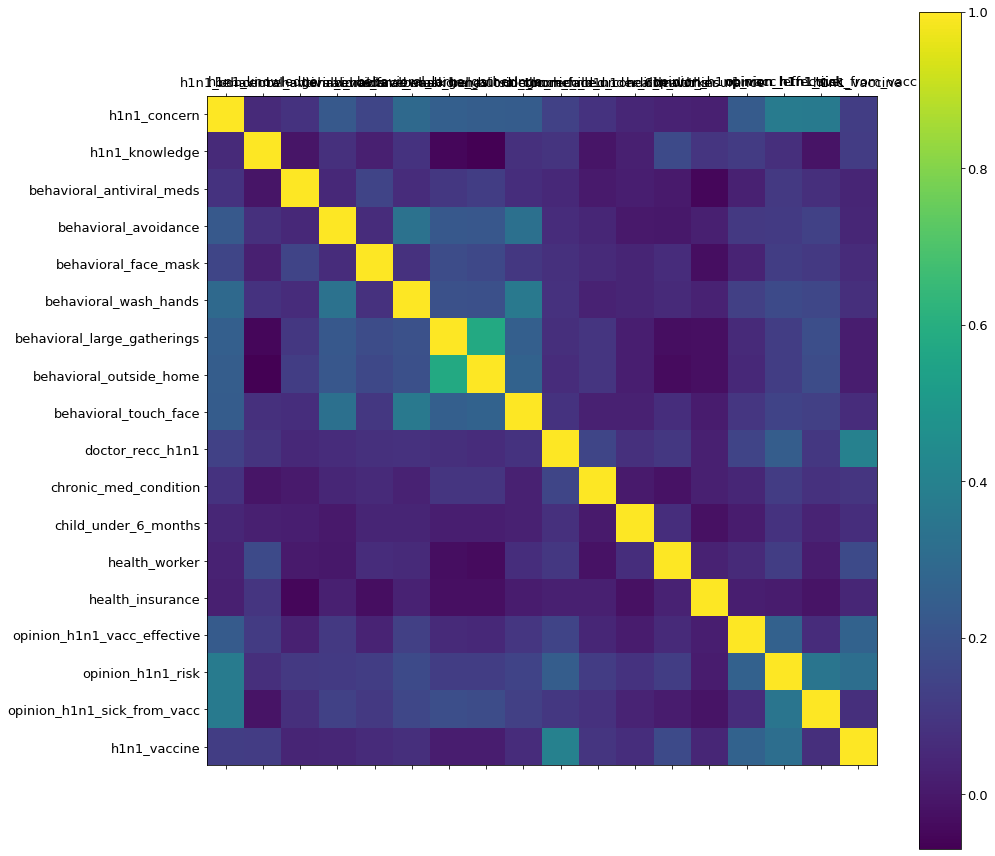

<Figure size 720x720 with 0 Axes>

In [15]:
explore.create_continuous_heatmap_h1n1(h1n1_train)

This is super tough to read so I'll just parse it out and present the take away 😅

Essentially, the more yellow the box is colored, the more it's correlated with our target feature which is h1n1_vaccine. From this is it looks like the features that are somewhat correlated to getting the h1n1 vaccine are:
- > doc_recc_h1n1
- > health_worker
- > opinion_h1n1_vacc_effective
- > opinion_h1n1_sick_from_vacc
- So these are the fetures I'll most likely in the use in my model 

- Let's look at one of these features as how it correlates to the target variable statistically

### Second Hypothesis:
- $H_0$: Getting the H1N11 flu shot is independent of their behaviour outside the home
- $H_a$: Getting the H1N11 flu shot is dependent on their behaviour outside the home

In [16]:
explore.h1n1_doc_recc_correlation(h1n1_train)


        Because p (0.0000) is less than alpha (0.05), Based on the pearson's r test, 
        it looks like there's a fairly strong correlation between the h1n1 vaccine status and
        whether the doctor recommends getting it. 
        



# Feature Engineering

I'll create some boolean columns for the features I think have the most relevance for modeling just to condense and make things easier.
- Features to be made into boolean values:
> - college_graduate, age_group_55_-_64_years, age_group_65+_years, income_poverty_>_75,000, encoded_marital_status, hhs_geo_region_bhuqouqj, hhs_geo_region_dqpwygqj, hhs_geo_region_fpwskwrf, hhs_geo_region_kbazzjca, hhs_geo_region_lrircsnp, hhs_geo_region_lzgpxyit

In [17]:
explore.feature_engineering(h1n1_train)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,encoded_employment_status,encoded_rent_or_own,encoded_marital_status,encoded_sex,age_group_18_-_34_years,age_group_35_-_44_years,age_group_45_-_54_years,age_group_55_-_64_years,age_group_65+_years,education_12_years,education_<_12_years,education_college_graduate,education_some_college,"income_poverty_<=_$75,000,_above_poverty","income_poverty_>_$75,000",income_poverty_below_poverty,race_black,race_hispanic,race_other_or_multiple,race_white,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,h1n1_concern_scaled,h1n1_knowledge_scaled,opinion_h1n1_vacc_effective_scaled,opinion_h1n1_risk_scaled,opinion_h1n1_sick_from_vacc_scaled,opinion_seas_vacc_effective_scaled,opinion_seas_risk_scaled,opinion_seas_sick_from_vacc_scaled,household_adults_scaled,household_children_scaled,graduated_college,age_55_and_up,over_75k,relevant_geography
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22067,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,4.0,2.0,2.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0,0,1,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.5,0.75,0.00,0.25,0.75,0.25,0.25,0.333333,0.000000,True,True,True,True
2876,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,4.0,5.0,5.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,bhuqouqj,"MSA, Principle City",0.0,0.0,0,0,1,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.5,1.00,0.75,1.00,1.00,0.75,0.25,0.000000,0.000000,False,True,False,True
22939,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,2.0,4.0,2.0,2.0,45 - 54 Years,College Graduate,Other or Multiple,Female,"> $75,000",Married,Rent,Employed,mlyzmhmf,Non-MSA,2.0,1.0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.5,0.50,0.75,0.25,0.75,0.25,0.25,0.666667,0.333333,True,False,True,False
4154,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,5.0,1.0,1.0,45 - 54 Years,< 12 Years,Other or Multiple,Male,"> $75,000",Married,Rent,Employed,mlyzmhmf,"MSA, Principle City",1.0,0.0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.75,0.00,0.00,1.00,0.00,0.00,0.333333,0.000000,False,False,True,False
23434,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,0,1,0,1,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.75,0.25,0.25,0.75,0.75,0.25,0.333333,0.000000,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

If you scroll WAAAAYYYY over to the right you'll see 4 columns that are full of True and False values. The cool thing about pandas is that the computer will read these "True" and "Values" as 1 or 0 so no need to label encode! Yay!

This is great becasuse when we move to modeling, we won't have to have as many features in the training data beacause we've boiled the insights down in to basically a bunch of yes's and no's

# Seasonal Explore

This next section is essentially going to recreate the same exploration but with a focus on the seasonal vaccine. 

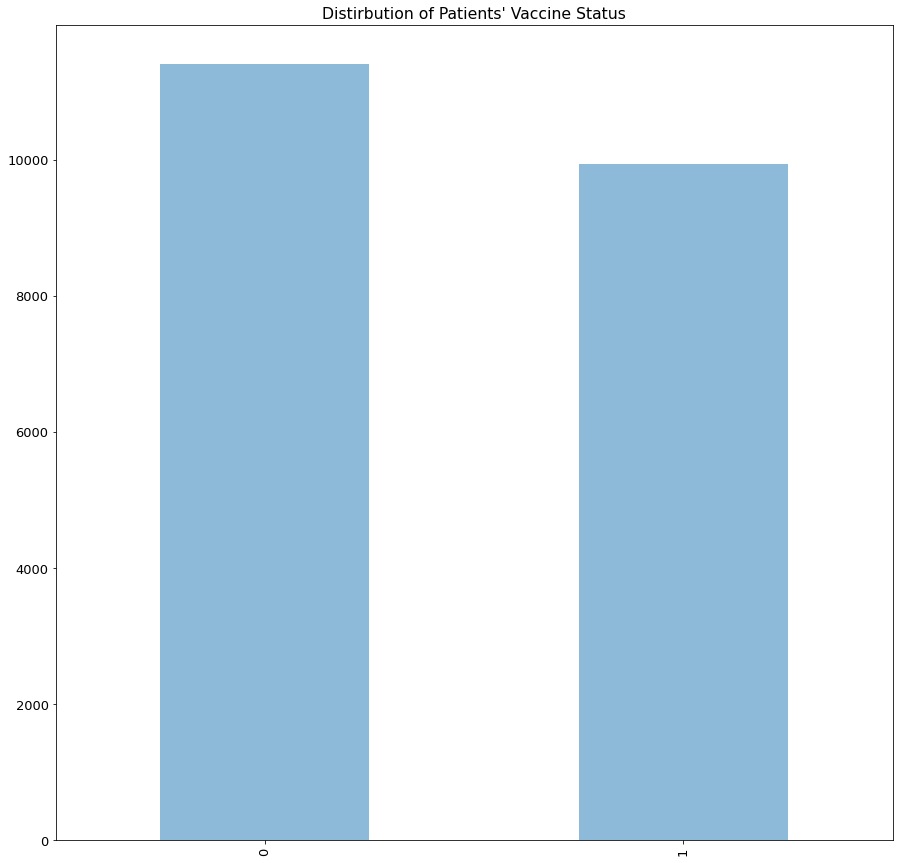

In [18]:
explore.distribution_of_seasonal_vaccine_status(seasonal_train)

### Key Takeaway ^^
- From this it looks like the distribution of people who got the vaccine vs those who didn't is a lot more even and way more people got it. There's gotta be a reason why more people went ahead with the seasonal vaccine. 

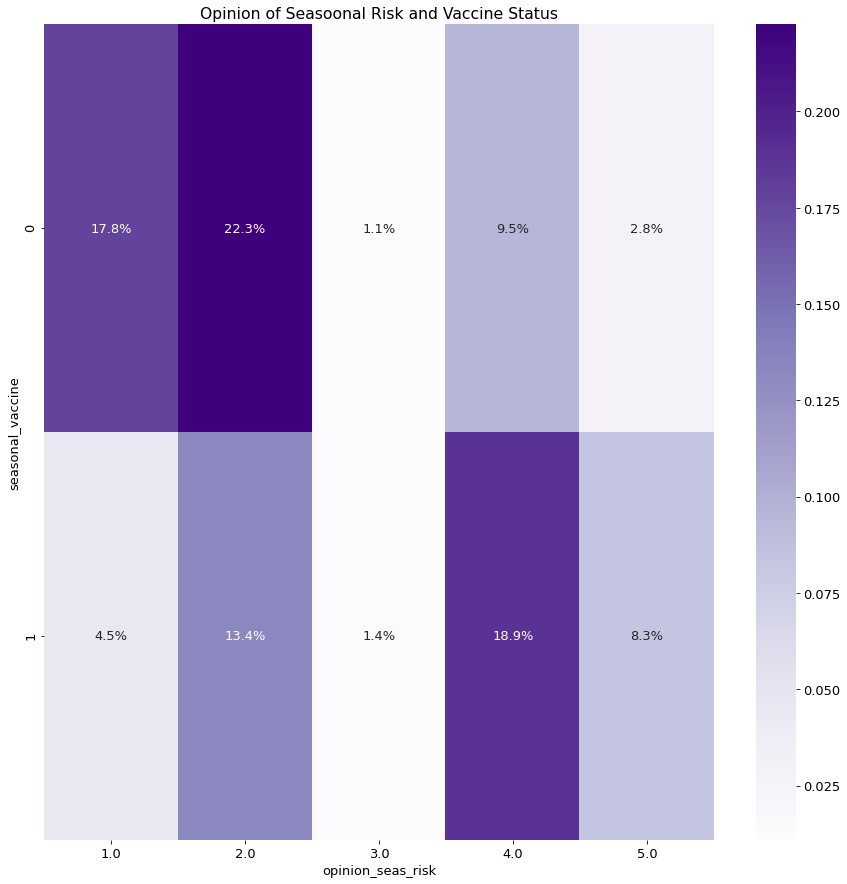

In [19]:
explore.opinion_seasonal_status(seasonal_train)

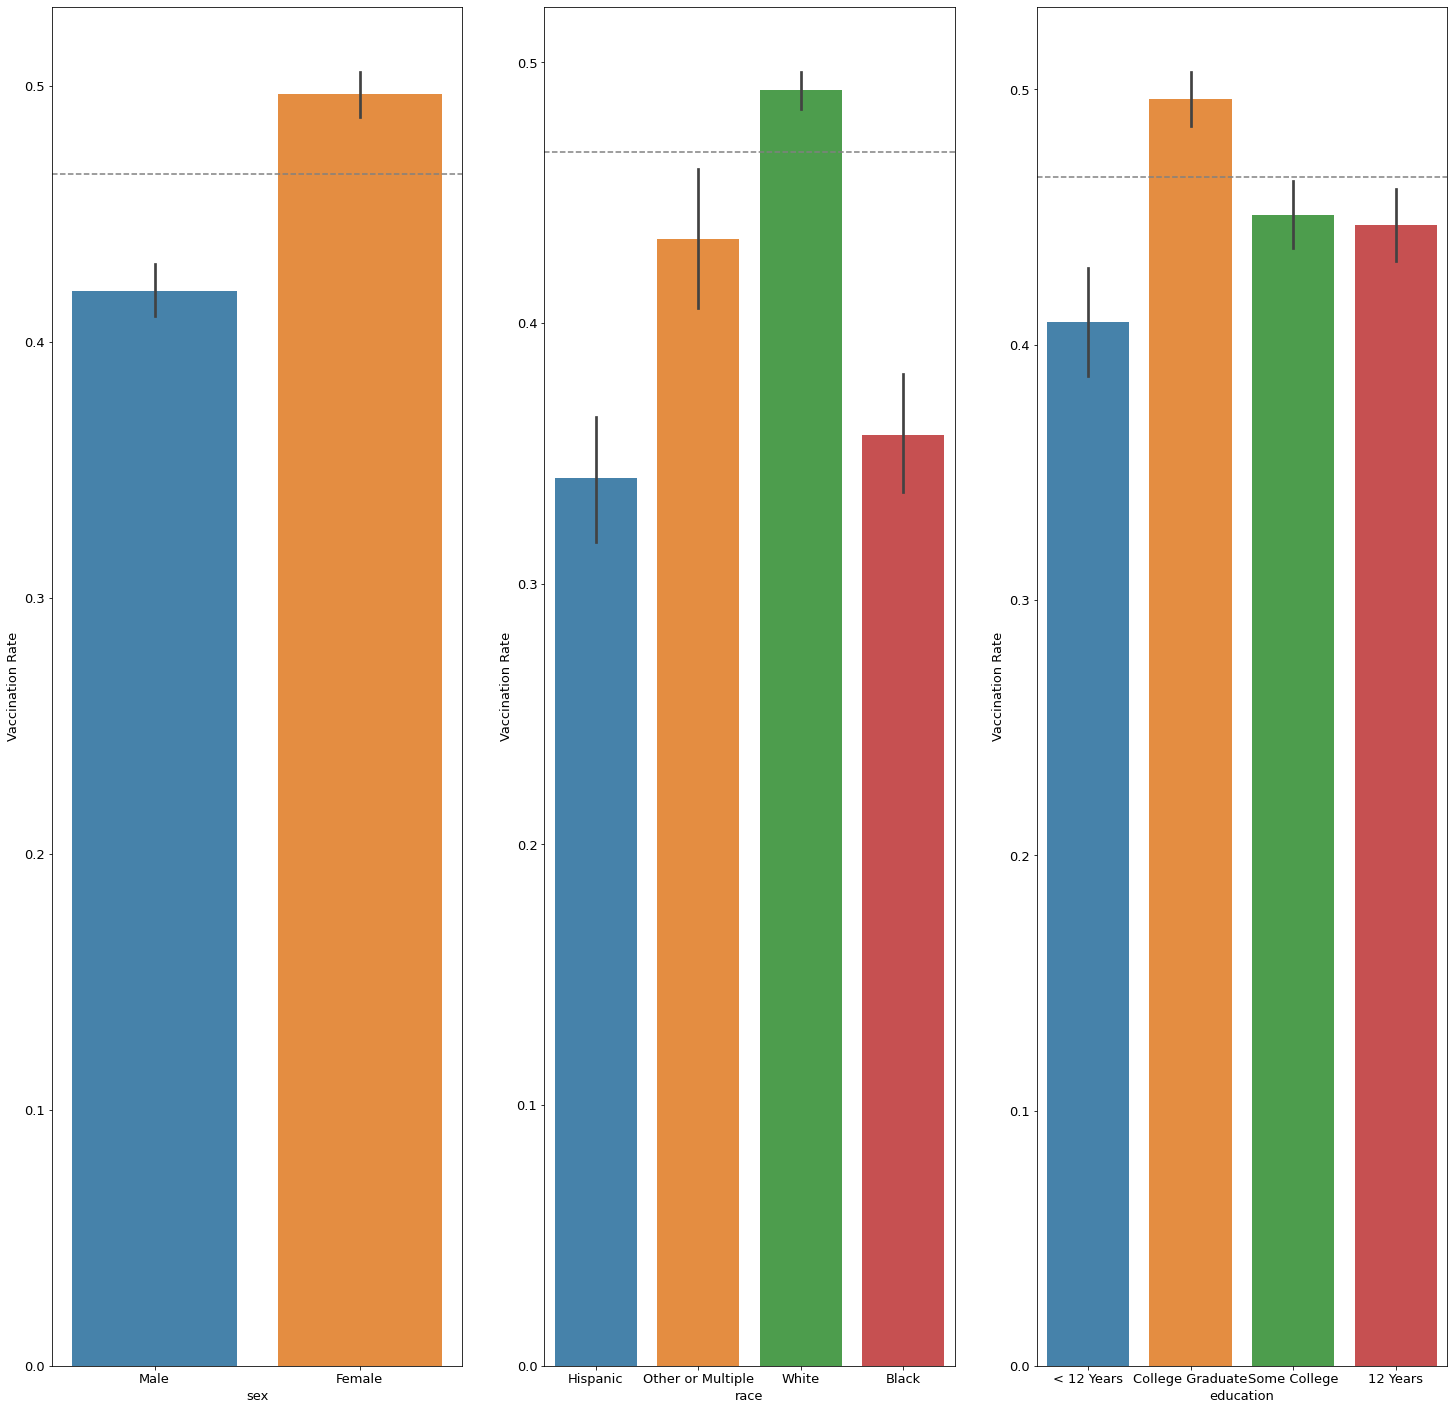

In [20]:
explore.sex_race_education_seasonal(seasonal_train)

### Key Takeaway ^^

- Based on these bar plots, it looks like white women who have graduated from college get vaccinated at a rate higher than average.

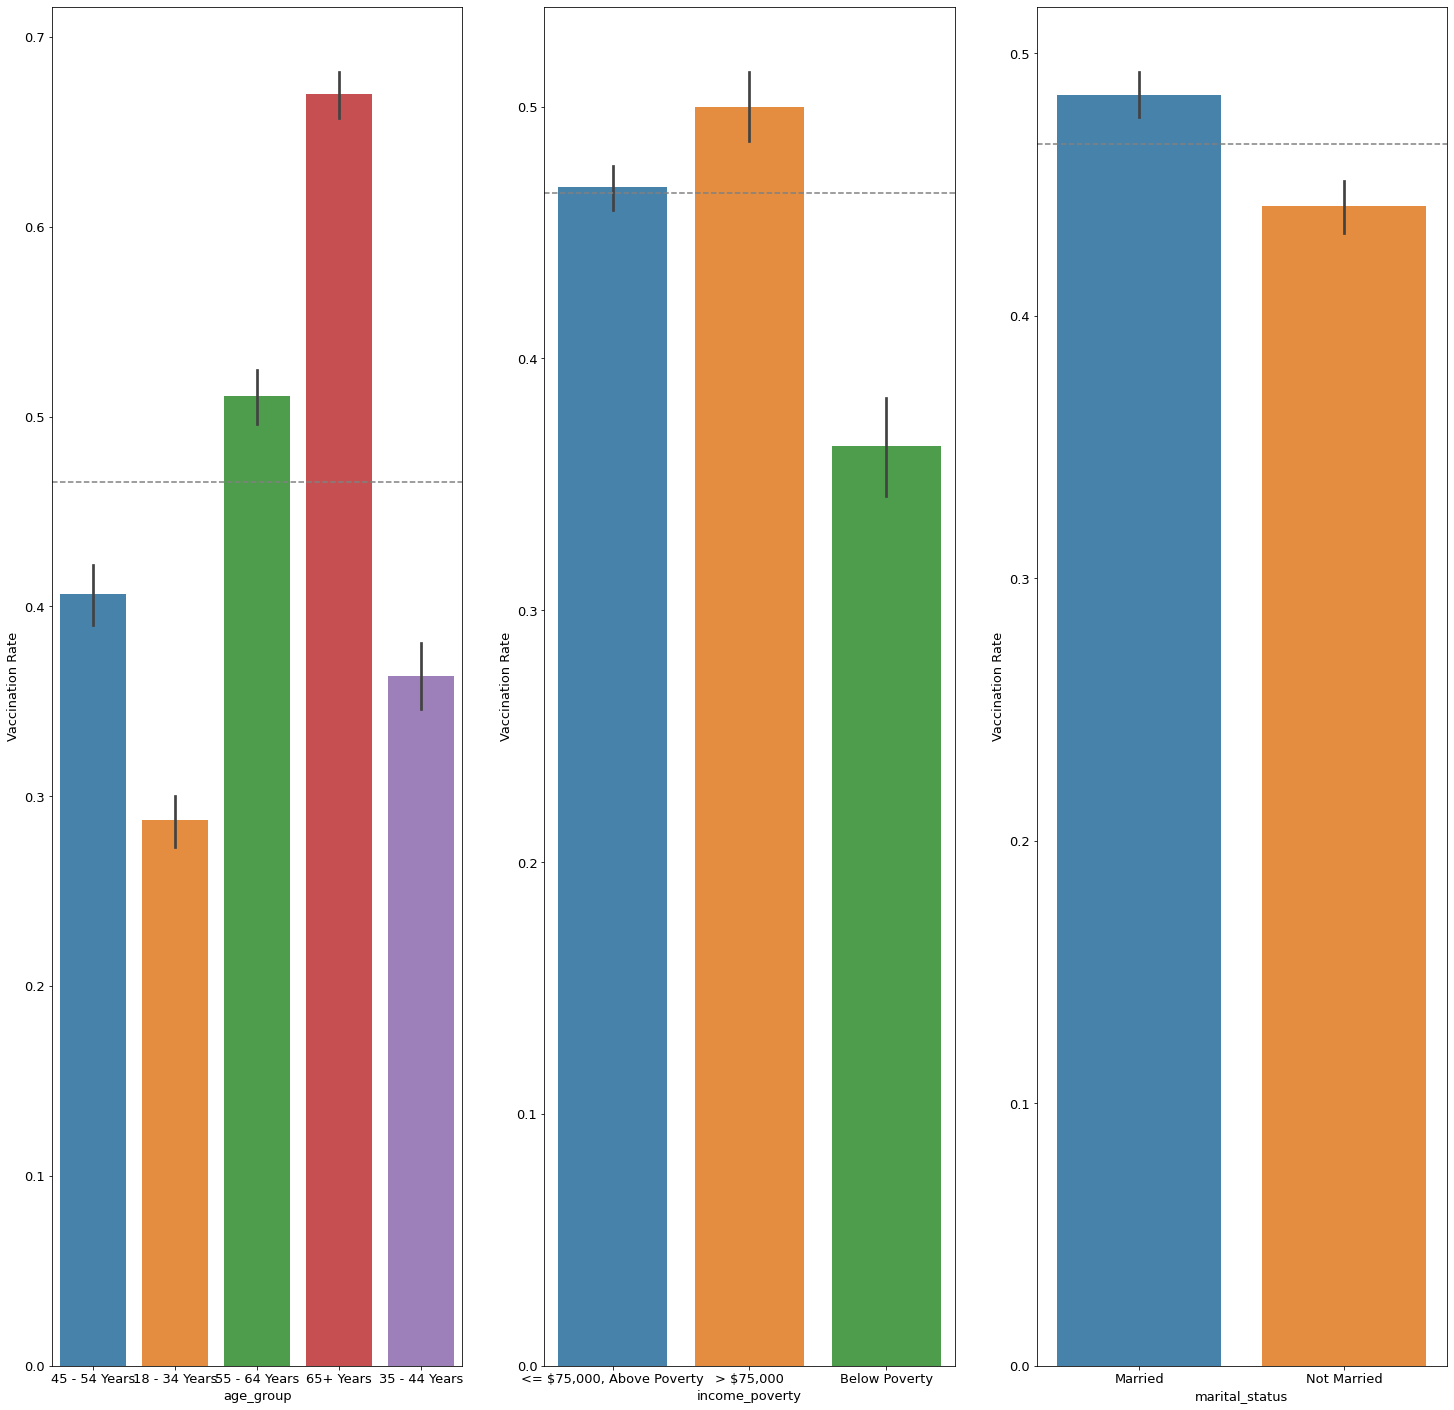

In [21]:
explore.age_income_marital_status_seaonal(seasonal_train)

### Key Takeaway ^^
- This looks like married folks older than 64 that are above the poverty line get vaccinated at a higher rate than normal

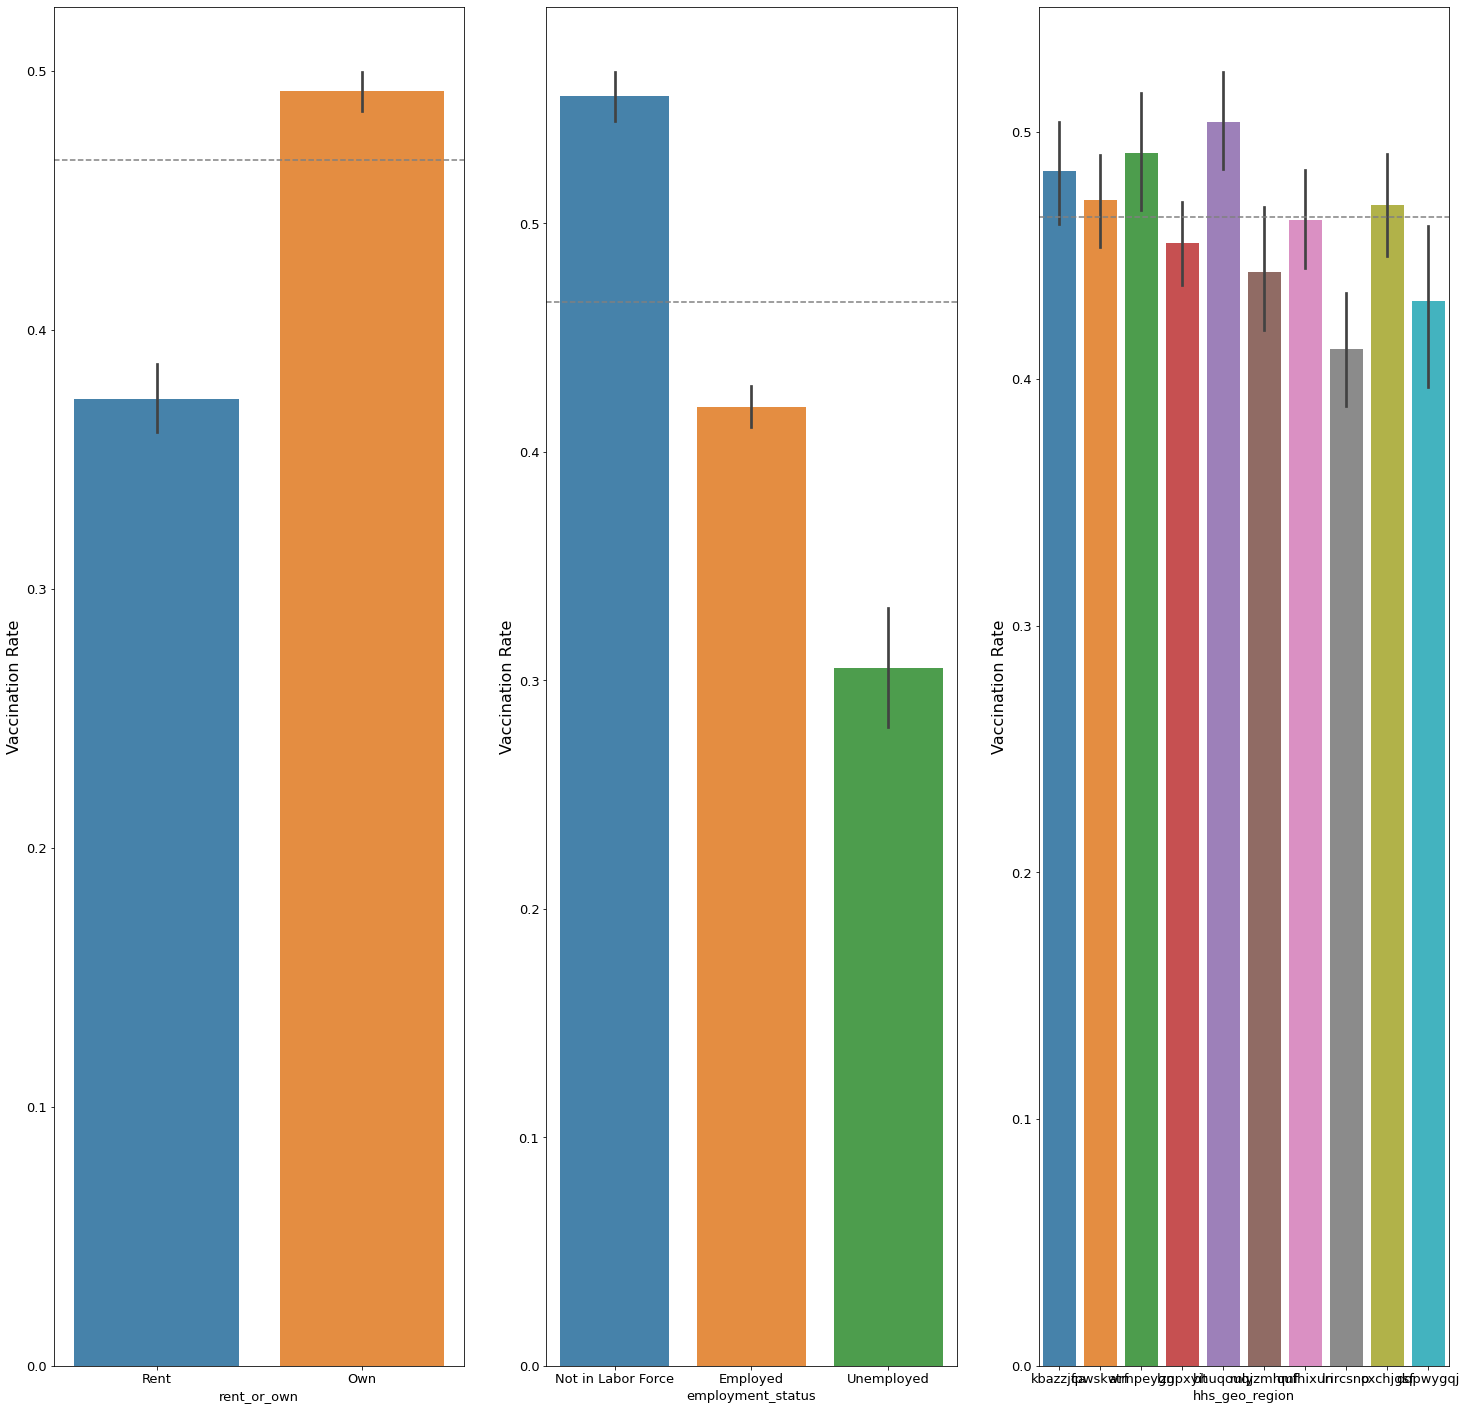

In [22]:
explore.rent_employment_geo_seaonal(seasonal_train)

### Key Takeaway ^^
- Homeowners not in the labor force (I'm thinking retired given the age data we saw earlier) who live in specific regions are vaccinated at a higher than average rate

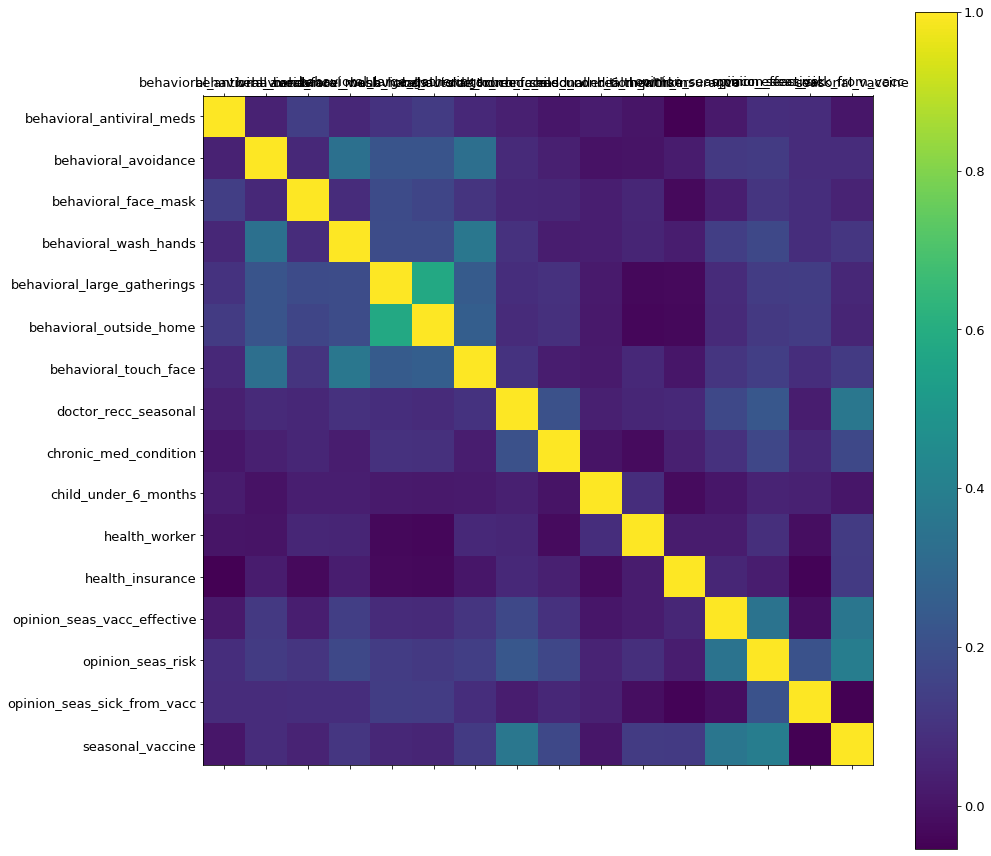

<Figure size 720x720 with 0 Axes>

In [23]:
explore.create_continuous_heatmap_seasonal(seasonal_train)

Here's our gross heatmap again. 

### Key Takeaway ^^
- The key takeaway's are similar. If the doctor reccomends they take the seasonal vaccine, if they have a high opion that they may get sick with seasonal flu, and if they feel like the flu shot is effective, those patients tended to get the vaccine more often.

#### That wraps up the exploration for modling sake. 

Shameless public health plug:
- I'd like to take a moment to discuss the impact of these insights if the goal is to increase vaccination. 
The groups that are undervaccinated are:
- > Non white
- > Not college graduated
- > Single
- > Working 
- > Making less than 75k a year
- > Renters

Those are the people that need to be considered when a flu vaccination drive or outreach program is being implemented. Ok, back to the project

# Modeling

This is a classification problem so I'll be using classification algorithms from Scikit-learn to make the predictions

__The positive case is "0" or Did not recieve the vaccine__ So when reading the prediction data keep in mind there are two types. One is predicting the probabliity of getting the vaccine which is on a scale between 0 and 1. The other is giving a 0 OR 1 as a prediction for not getting or getting the vaccine based on the probability. The project is asking for the probablity.


## Modeling Methodology

- The purpose of a validation set is to leave more data unseen that our model can "practice" on before giving it the test data. If the model is not performing well or is overfit, I can use the training set and validation set to try to fix this without feeding in my training data. Random seeds are set throughout the functions used below to ensure reporoducibility. 
- Each model was fit on the training data, analyzed on the validate set and then applied to the test data to determine the best model
- The results of the predictions are added to a dataframe and the metrics for each model are desplayed as classification reports, confusion matrices, and in an accuracy dataframe

### Creating the Validation set

In [24]:
X_train_h1n1, y_train_h1n1, X_val_h1n1, y_val_h1n1, X_test_h1n1, y_test_h1n1 = modeling.create_h1n1_validate_set(h1n1_train, h1n1_test)

In [25]:
X_train_seas, y_train_seas, X_val_seas, y_val_seas, X_test_seas, y_test_seas = modeling.create_seas_validate_set(seasonal_train, seasonal_test)

Let's validate that the splits were done

In [26]:
X_train_h1n1

,encoded_sex,encoded_marital_status,encoded_rent_or_own,encoded_employment_status,graduated_college,age_55_and_up,over_75k,relevant_geography,opinion_h1n1_risk_scaled,doctor_recc_h1n1,behavioral_antiviral_meds
respondent_id,,,,,,,,,,,
12222,0,1,0,1,False,True,False,True,0.75,0.0,0.0
4573,0,1,0,1,True,True,False,False,0.75,1.0,0.0
20805,1,1,1,0,True,True,True,False,0.25,0.0,0.0
15657,1,0,0,0,True,True,True,False,0.00,0.0,0.0
8436,0,0,0,0,False,False,True,True,1.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8067,0,0,0,1,False,True,False,True,0.25,0.0,0.0
19302,0,0,1,0,False,False,False,True,0.75,0.0,0.0
22358,0,1,0,1,False,False,False,False,0.50,0.0,0.0


Look's good. Next step, create a model

__Only the best model is shown in this notebook__
- If you would like to look at the other models I explored, you can look at the notebook titled modeling.ipynb in this repository for a more detailed process

## The best performing model was the K Nearest Neighbor algorithm with n_neighbors=4

In [27]:
h1n1_test_confusion_matrix, seasonal_test_confusion_matrix = modeling.create_knn_model(X_test_h1n1, y_test_h1n1, X_test_seas, y_test_seas)

-------------------------------------------------------

H1N1 Vaccine Classification Report

              precision    recall  f1-score   support

  No Vaccine       0.84      0.98      0.91      4207
     Vaccine       0.80      0.33      0.47      1135

    accuracy                           0.84      5342
   macro avg       0.82      0.65      0.69      5342
weighted avg       0.83      0.84      0.81      5342

-------------------------------------------------------

Seasonal Vaccine Classification Report

              precision    recall  f1-score   support

  No Vaccine       0.76      0.91      0.83      2855
     Vaccine       0.86      0.67      0.75      2487

    accuracy                           0.80      5342
   macro avg       0.81      0.79      0.79      5342
weighted avg       0.81      0.80      0.79      5342

-------------------------------------------------------


The models are fairly accurate at 84% for the h1n1 vaccine and 80% for the seaonal flu vaccine. Both of these models are using unseen test data. 

In [28]:
predictions_df = modeling.create_prediction_df(X_test_h1n1, y_test_h1n1, X_test_seas, y_test_seas)
predictions_df

,Probability_of_getting_h1n1_vaccine,Probability_of_getting_seasonal_vaccine
Respondent_id,,
1372,0.00,0.75
21526,0.00,0.25
396,0.00,0.00
11045,0.25,0.00
5072,0.25,1.00
...,...,...
20153,0.75,0.75
8108,0.25,0.50
19271,0.75,0.00


Above is the final dataframe with each respondent recieving a probability of getting each vaccine

# Conclusion